# Segunda abordagem
### Relação com outros produtos do banco
Aqui analisamos toda a base que se encaixa nos filtros anteriores, possuindo perfil digital ou não

In [ ]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

client = Client()

query = """SELECT *
FROM `hacka-1.dataset.view_dados_hacka`
WHERE Sub_Produto in ('CDC VEICULOS DE PASSEIO','PRE APROVADO CDC VEICULOS DE PASSEIO','REFINANCIAMENTO VEICULOS DE PASSEIO')
AND QtParcelas in (24, 36, 48, 54, 60)
AND QtCilindradaVeiculo > 995
AND QtCilindradaVeiculo < 3000
AND QtQuilometragemVeiculo < 150000
AND AaFabricacaoVeiculo >= 2008
AND AaFabricacaoVeiculo <= 2019"""
job = client.query(query)
df = job.to_dataframe()

In [ ]:
colunas = ['tempo_desde_primeiro_contrato',
'tempo_desde_ultimo_contrato',
'QTD_SEGURO',
'QTD_CP_CONSIGNADO',
'QTD_CDCCG',
'QTD_CONTA_DIGITAL',
'QTD_CARTAO',
'QTD_CP',
'QTD_OUTROS',
'flmat30conta',
'flmat60conta',
'flmat90conta',
'flmau30conta',
'flmau60conta',
'flmau90conta',
'fl_renovou',
'CdUfNaturalidade',
'Grupo_Etario',
'VrRenda',
'CdOcupacaoCBO',
'Capacidade_de_Pagamento_1',
'Capacidade_de_Pagamento_2',
'Capacidade_de_Pagamento_3',
'Capacidade_de_Pagamento_4',
'Capacidade_de_Pagamento_5',
'Capacidade_de_Pagamento_6',
'Capacidade_de_Pagamento_7']
df_red = df[colunas]

In [ ]:
from sklearn.preprocessing import QuantileTransformer 

new_transf = QuantileTransformer(output_distribution='normal').fit_transform(df_red.tempo_desde_primeiro_contrato.values.reshape(-1, 1))
df_red.tempo_desde_primeiro_contrato = new_transf

new_transf = QuantileTransformer(output_distribution='normal').fit_transform(df_red.tempo_desde_ultimo_contrato.values.reshape(-1, 1))
df_red.tempo_desde_ultimo_contrato = new_transf

In [ ]:
NUM_COLS = [
    'tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato',
    'QTD_CP_CONSIGNADO','QTD_CDCCG','QTD_CONTA_DIGITAL',
    'QTD_CARTAO','QTD_OUTROS','flmat30conta', 'flmat60conta', 
    'flmat90conta', 'flmau30conta', 'flmau60conta', 'flmau90conta',
    'Grupo_Etario','VrRenda', 'Capacidade_de_Pagamento_1', 
    'Capacidade_de_Pagamento_2', 'Capacidade_de_Pagamento_3', 
    'Capacidade_de_Pagamento_4', 'Capacidade_de_Pagamento_5', 
    'Capacidade_de_Pagamento_6', 'Capacidade_de_Pagamento_7'
]

CAT_COLS = [
    'QTD_SEGURO','CdUfNaturalidade','CdOcupacaoCBO'
]

TARG_COL = ['fl_renovou']

In [ ]:
for col in ['flmat30conta', 'flmat60conta', 'flmat90conta', 'flmau30conta', 'flmau60conta', 'flmau90conta']:
    df_red.loc[df_red[col].isna(),col] = 0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df_cat = df_red[CAT_COLS]
encoder = OneHotEncoder()
cat_mtx = encoder.fit_transform(df_cat)
df_cat = pd.DataFrame(cat_mtx.toarray(), columns = encoder.get_feature_names_out())
df_cat.head()

,QTD_SEGURO_1,QTD_SEGURO_10,QTD_SEGURO_11,QTD_SEGURO_12,QTD_SEGURO_12 ou +,QTD_SEGURO_2,QTD_SEGURO_3,QTD_SEGURO_4,QTD_SEGURO_5,QTD_SEGURO_6,...,CdOcupacaoCBO_8069,CdOcupacaoCBO_8099,CdOcupacaoCBO_8620,CdOcupacaoCBO_8673,CdOcupacaoCBO_8700,CdOcupacaoCBO_9170,CdOcupacaoCBO_9502,CdOcupacaoCBO_9876,CdOcupacaoCBO_Indeterminado,CdOcupacaoCBO_Outros
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final = pd.concat([df_cat,df_red[NUM_COLS], df_red.fl_renovou], axis = 1)

In [ ]:
df_final = df_final.dropna().reset_index(drop=True)

In [ ]:
df_y = df_final.fl_renovou
del df_final['fl_renovou']

In [ ]:
features_interaction = ['QTD_SEGURO_1',
'QTD_SEGURO_10',
'QTD_SEGURO_11',
'QTD_SEGURO_12',
'QTD_SEGURO_12 ou +',
'QTD_SEGURO_2',
'QTD_SEGURO_3',
'QTD_SEGURO_4',
'QTD_SEGURO_5',
'QTD_SEGURO_6',
'QTD_SEGURO_7',
'QTD_SEGURO_8',
'QTD_SEGURO_9',
'QTD_CP_CONSIGNADO',
'QTD_CDCCG',
'QTD_CONTA_DIGITAL',
'QTD_CARTAO',
'QTD_OUTROS']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, interaction_only=True)
df_poly = poly.fit_transform(df_final[features_interaction])


In [ ]:
df_poly = pd.DataFrame(df_poly,columns = poly.get_feature_names_out())

In [ ]:
del df_poly['1']

In [ ]:
df_poly = df_poly.loc[:, (df_poly != 0).any(axis=0)]

In [ ]:
for col in features_interaction:
    del df_poly[col]

In [ ]:
df_consolidado = pd.concat([df_final, df_poly], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_consolidado, df_y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversample = SMOTE(sampling_strategy=0.7, random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_over, label=y_over)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.metrics import roc_auc_score
import numpy as np

def objective(params):
    xgb.set_config(verbosity=0)
    booster = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=500,
            evals=[(dtest, 'validation')],
            early_stopping_rounds=50,
            verbose_eval= False
        )
    y_pred = booster.predict(dtest)
    metric = 1 - roc_auc_score(y_test, y_pred)

    return {'loss': metric, 'status': STATUS_OK}

search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 50, 100, 1)),
    'max_delta_step': scope.int(hp.quniform('max_delta_step', 0, 10, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'scale_pos_weight': hp.loguniform('scale_pos_weight', -1, 1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'binary:logistic',
    'eval_metric' : 'auc',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=Trials()
)

100%|██████████| 100/100 [1:27:06<00:00, 52.26s/trial, best loss: 0.3950619369715288]


In [ ]:
best_result

{'learning_rate': 0.0744826948331869,
 'max_delta_step': 2.0,
 'max_depth': 51.0,
 'min_child_weight': 3.722132768800759,
 'scale_pos_weight': 1.8339305861859643}

In [ ]:
param = {'learning_rate': 0.0744826948331869,
 'max_delta_step': 2,
 'max_depth': 51,
 'min_child_weight': 3.722132768800759,
 'scale_pos_weight': 1.8339305861859643}
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['seed'] = 42
num_round = 1000
bst = xgb.train(
            params=param,
            dtrain=dtrain,
            num_boost_round=1000,
            evals=[(dtest, 'validation')],
            early_stopping_rounds=100,
            verbose_eval= False)

In [ ]:
f_i_dict = bst.get_score(importance_type = 'gain')
f_i_dict = {k: v for k, v in sorted(f_i_dict.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
f_i_dict

{'CdUfNaturalidade_Sudeste': 354.3580322265625,
 'CdUfNaturalidade_Sul': 130.39212036132812,
 'CdOcupacaoCBO_2684': 102.15770721435547,
 'CdOcupacaoCBO_Indeterminado': 77.70697021484375,
 'CdUfNaturalidade_Norte': 51.987152099609375,
 'CdOcupacaoCBO_7897': 43.623355865478516,
 'QTD_SEGURO_4 QTD_CDCCG QTD_CONTA_DIGITAL QTD_CARTAO': 29.363439559936523,
 'CdOcupacaoCBO_8700': 27.59644889831543,
 'QTD_SEGURO_4': 27.004480361938477,
 'QTD_SEGURO_3': 26.42230224609375,
 'flmat30conta': 25.70826530456543,
 'CdOcupacaoCBO_4857': 25.47775650024414,
 'QTD_SEGURO_1 QTD_CP_CONSIGNADO': 23.69093132019043,
 'QTD_SEGURO_6': 23.62004280090332,
 'CdOcupacaoCBO_Outros': 22.646137237548828,
 'CdOcupacaoCBO_8069': 22.332754135131836,
 'CdOcupacaoCBO_7598': 21.65192222595215,
 'CdOcupacaoCBO_5712': 21.61886978149414,
 'CdOcupacaoCBO_3694': 21.4447078704834,
 'CdOcupacaoCBO_3968': 21.14576530456543,
 'CdOcupacaoCBO_9170': 19.84295654296875,
 'CdOcupacaoCBO_7631': 19.77652359008789,
 'QTD_SEGURO_1': 19.68291

In [ ]:
bes_int = {x:y for x,y in zip(list(f_i_dict.keys()),list(f_i_dict.values())) if x in list(df_poly.columns)}
best_int = list(bes_int.keys())[:17]

In [ ]:
bes_int

{'QTD_SEGURO_4 QTD_CDCCG QTD_CONTA_DIGITAL QTD_CARTAO': 29.363439559936523,
 'QTD_SEGURO_1 QTD_CP_CONSIGNADO': 23.69093132019043,
 'QTD_SEGURO_5 QTD_OUTROS': 18.487850189208984,
 'QTD_SEGURO_5 QTD_CDCCG': 18.441913604736328,
 'QTD_SEGURO_6 QTD_CDCCG': 15.876623153686523,
 'QTD_SEGURO_5 QTD_CDCCG QTD_CONTA_DIGITAL': 15.758769035339355,
 'QTD_SEGURO_6 QTD_CDCCG QTD_CARTAO': 15.57605266571045,
 'QTD_SEGURO_1 QTD_CARTAO': 13.198683738708496,
 'QTD_SEGURO_2 QTD_CP_CONSIGNADO': 12.800384521484375,
 'QTD_SEGURO_2 QTD_CARTAO': 12.521429061889648,
 'QTD_SEGURO_6 QTD_CARTAO': 12.32657527923584,
 'QTD_SEGURO_9 QTD_CDCCG QTD_CONTA_DIGITAL': 12.165212631225586,
 'QTD_SEGURO_4 QTD_CARTAO': 12.131815910339355,
 'QTD_SEGURO_9 QTD_CONTA_DIGITAL': 11.69591999053955,
 'QTD_SEGURO_2 QTD_CDCCG QTD_CONTA_DIGITAL': 11.039230346679688,
 'QTD_CDCCG QTD_OUTROS': 10.398239135742188,
 'QTD_SEGURO_3 QTD_CDCCG': 10.278960227966309,
 'QTD_CDCCG QTD_CONTA_DIGITAL': 9.567814826965332,
 'QTD_SEGURO_5 QTD_CDCCG QTD_CART

In [ ]:
df = pd.concat([df_consolidado,df_y], axis=1)
df.shape

(40774, 400)

In [ ]:
df_best = df[best_int+['fl_renovou']]

In [ ]:
df_best = df_best.melt(['fl_renovou'], var_name='feat',  value_name='vals')

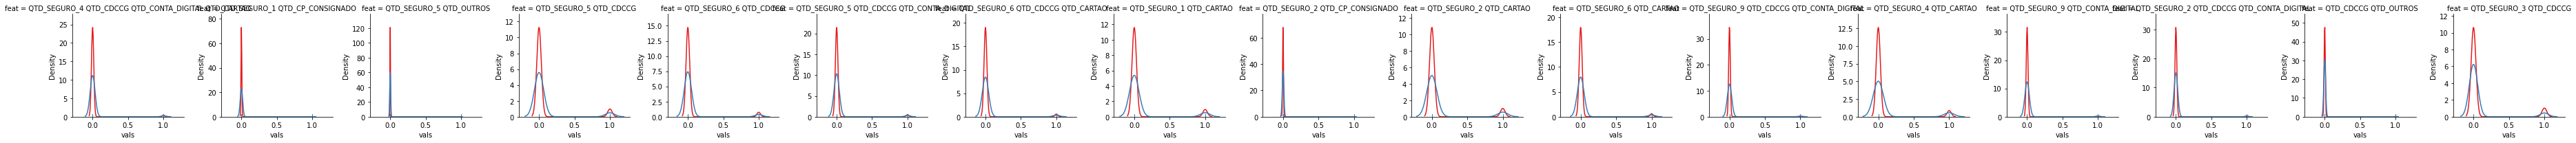

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

g = sns.FacetGrid(df_best, col='feat', hue="fl_renovou", palette="Set1", sharey = False)
g = (g.map(sns.distplot, "vals", hist=False, rug=True))

In [ ]:
df_final = df[list(bes_int.keys())+['fl_renovou']]

In [ ]:
conversao = {}
imp = {}
for col in df_final:
    if col != 'fl_renovou':
        conversao[col] = df_final.loc[df_final.fl_renovou == 1][col].sum()/df_final.loc[df_final.fl_renovou == 1][col].count()
        imp[col] = bes_int[col]
conv = {k: v for k, v in sorted(conversao.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
for col in conv.keys():
    print(col, imp[col], conversao[col],df_final.loc[df_final.fl_renovou == 1][col].sum(),df_final[col].sum()/df_final[col].count())

QTD_CDCCG QTD_CARTAO  
QTD_CONTA_DIGITAL QTD_CARTAO  
QTD_CDCCG QTD_CONTA_DIGITAL  
QTD_SEGURO QTD_CARTAO  

In [ ]:
df_red[NUM_COLS].sum()

tempo_desde_primeiro_contrato        18.922742
tempo_desde_ultimo_contrato           0.349698
QTD_CP_CONSIGNADO                   503.000000
QTD_CDCCG                         18830.000000
QTD_CONTA_DIGITAL                 14456.000000
QTD_CARTAO                        23468.000000
QTD_OUTROS                          479.000000
flmat30conta                       5010.000000
flmat60conta                       4553.000000
flmat90conta                       3896.000000
flmau30conta                      11731.000000
flmau60conta                      10991.000000
flmau90conta                      10023.000000
Grupo_Etario                     181074.000000
VrRenda                            -690.584348
Capacidade_de_Pagamento_1         25527.000000
Capacidade_de_Pagamento_2          -634.871614
Capacidade_de_Pagamento_3           193.920315
Capacidade_de_Pagamento_4            -2.951617
Capacidade_de_Pagamento_5          -342.016742
Capacidade_de_Pagamento_6           318.602788
Capacidade_de